In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_wqi_grade(wqi):
    if wqi <= 25:
        return 'A'
    elif 26 <= wqi <= 50:
        return 'B'
    else:
        return 'C'

# Step 1: Load Dataset
df = pd.read_csv("D:\\Clean_Green\\Dataset.csv")

In [3]:
print("Dataset Overview:")
print(df.head())
print("\nDataset Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values Check:")
print(df.isnull().sum())


Dataset Overview:
     pH  TDS  Turbidity    WQI WQI Grade
0  6.73  185       0.22  13.86         A
1  7.52  208       1.37  23.47         A
2  6.80  140       2.25  22.97         A
3  6.80  140       2.25  22.97         A
4  7.52  208       1.37  23.47         A

Dataset Statistics:
               pH          TDS   Turbidity         WQI
count  900.000000   900.000000  900.000000  900.000000
mean     6.926089   404.886667   10.870856  102.752556
std      1.181549   357.851092   15.038711  129.825811
min      4.510000    58.000000    0.090000   13.860000
25%      6.320000   167.000000    1.505000   22.970000
50%      6.940000   216.000000    2.340000   42.870000
75%      7.520000   546.000000   17.000000  133.027500
max      9.470000  1499.000000   54.920000  571.880000

Missing Values Check:
pH           0
TDS          0
Turbidity    0
WQI          0
WQI Grade    0
dtype: int64


In [4]:
if 'WQI_Grade' not in df.columns:
    df['WQI_Grade'] = df['WQI'].apply(get_wqi_grade)

# Encode the grade for classification models
le = LabelEncoder()
df['WQI_Grade_Encoded'] = le.fit_transform(df['WQI_Grade'])

# Create a comprehensive visualization of the data
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

Text(0.5, 1.0, 'Turbidity Distribution')

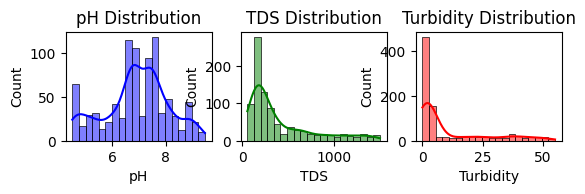

In [6]:
# Distribution plots
plt.subplot(3, 3, 1)
sns.histplot(df['pH'], bins=20, kde=True, color='blue')
plt.title("pH Distribution")

plt.subplot(3, 3, 2)
sns.histplot(df['TDS'], bins=20, kde=True, color='green')
plt.title("TDS Distribution")

plt.subplot(3, 3, 3)
sns.histplot(df['Turbidity'], bins=20, kde=True, color='red')
plt.title("Turbidity Distribution")

Text(0.5, 1.0, 'WQI Grade Distribution')

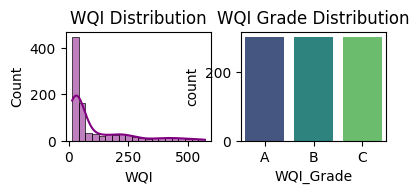

In [7]:
plt.subplot(3, 3, 4)
sns.histplot(df['WQI'], bins=20, kde=True, color='purple')
plt.title("WQI Distribution")

# Count of WQI Grades
plt.subplot(3, 3, 5)
sns.countplot(x='WQI_Grade', data=df, palette='viridis')
plt.title("WQI Grade Distribution")

Text(0.5, 1.0, 'Correlation Matrix')

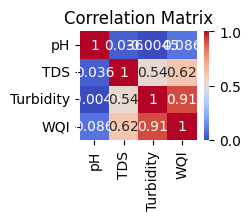

In [8]:
# Correlation heatmap
plt.subplot(3, 3, 6)
correlation = df[['pH', 'TDS', 'Turbidity', 'WQI']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

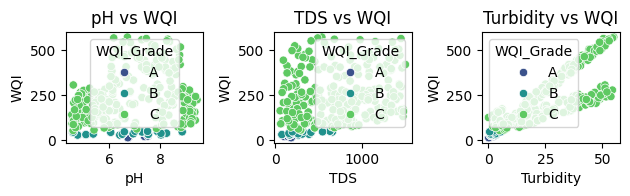

In [9]:

# Scatterplots of each parameter vs WQI
plt.subplot(3, 3, 7)
sns.scatterplot(x='pH', y='WQI', hue='WQI_Grade', data=df, palette='viridis')
plt.title("pH vs WQI")

plt.subplot(3, 3, 8)
sns.scatterplot(x='TDS', y='WQI', hue='WQI_Grade', data=df, palette='viridis')
plt.title("TDS vs WQI")

plt.subplot(3, 3, 9)
sns.scatterplot(x='Turbidity', y='WQI', hue='WQI_Grade', data=df, palette='viridis')
plt.title("Turbidity vs WQI")

plt.tight_layout()
plt.savefig('data_visualization.png')
plt.show()

In [10]:
# Step 3: Prepare Data for Training
X = df[['pH', 'TDS', 'Turbidity']]
y_reg = df['WQI']  # For regression
y_class = df['WQI_Grade_Encoded']  # For classification

# Split data
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42)


In [11]:
# Step 4: Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:

# Step 5: Train Multiple ML Models for WQI Regression
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(kernel='rbf')
}


In [13]:

# Dictionary to store results
regression_results = {}

# Train and evaluate each model
for name, model in regression_models.items():
    print(f"\nTraining {name}...")
    
    # Cross-validation for more robust evaluation
    cv_scores = cross_val_score(model, X_train_scaled, y_reg_train, cv=5, scoring='r2')
    print(f"Cross-Validation R² Scores: {cv_scores}")
    print(f"Mean CV R² Score: {np.mean(cv_scores):.4f}")
    
    # Train on the full training set
    model.fit(X_train_scaled, y_reg_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mae = mean_absolute_error(y_reg_test, y_pred)
    mse = mean_squared_error(y_reg_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_reg_test, y_pred)
    
    # Store results
    regression_results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2,
        "Mean CV R2": np.mean(cv_scores)
    }

# Display regression model performance
results_df = pd.DataFrame(regression_results)
print("\nRegression Model Performance:")
print(results_df)



Training Linear Regression...
Cross-Validation R² Scores: [0.88442354 0.86745076 0.86095499 0.8514472  0.85945581]
Mean CV R² Score: 0.8647

Training Decision Tree...
Cross-Validation R² Scores: [0.98557196 0.99594173 0.98172991 0.98733835 0.99179224]
Mean CV R² Score: 0.9885

Training Random Forest...
Cross-Validation R² Scores: [0.99181888 0.99512959 0.98867083 0.98998376 0.99502485]
Mean CV R² Score: 0.9921

Training Gradient Boosting...
Cross-Validation R² Scores: [0.99289852 0.99314962 0.99087649 0.98721017 0.99420909]
Mean CV R² Score: 0.9917

Training SVR...
Cross-Validation R² Scores: [0.4870177  0.39268903 0.37246956 0.29030426 0.46538822]
Mean CV R² Score: 0.4016

Regression Model Performance:
            Linear Regression  Decision Tree  Random Forest  \
MAE                 25.767164       3.524944       3.921552   
MSE               1941.676013     146.188673      89.295906   
RMSE                44.064453      12.090851       9.449651   
R2 Score             0.816111     

<Figure size 1400x800 with 0 Axes>

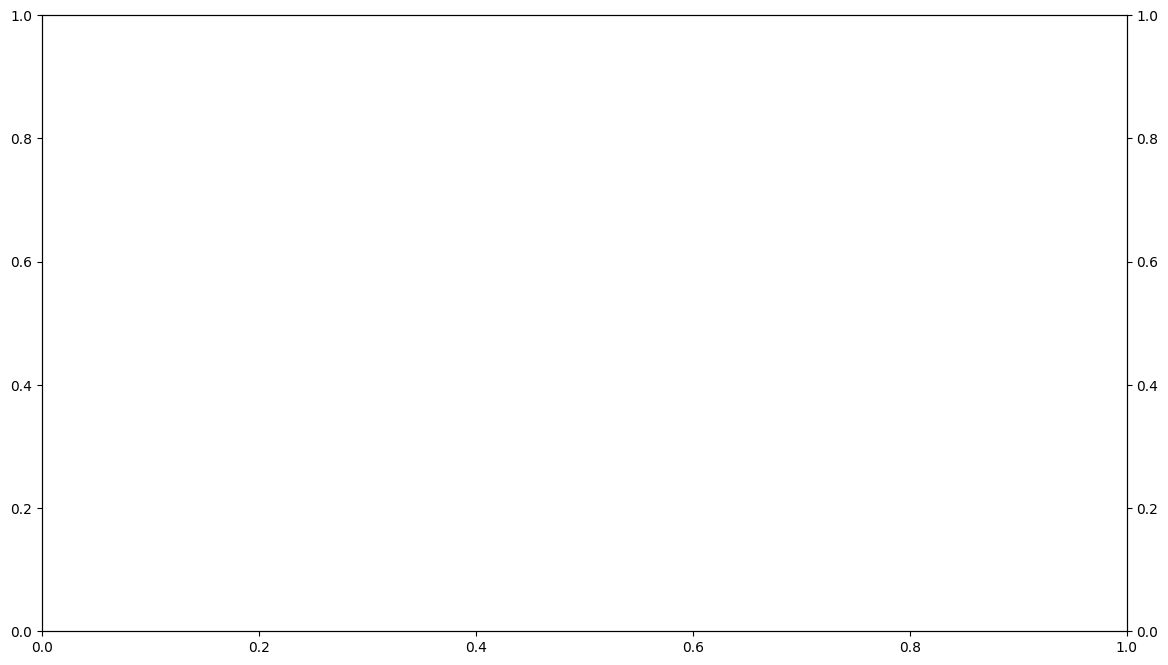

In [14]:
# Create a bar chart to compare model performance
plt.figure(figsize=(14, 8))
models = list(regression_results.keys())
r2_scores = [regression_results[model]["R2 Score"] for model in models]
rmse_scores = [regression_results[model]["RMSE"] for model in models]

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

In [15]:
bars1 = ax1.bar(x - width/2, r2_scores, width, label='R² Score', color='blue')
bars2 = ax2.bar(x + width/2, rmse_scores, width, label='RMSE', color='red')

ax1.set_xlabel('Models')
ax1.set_ylabel('R² Score', color='blue')
ax2.set_ylabel('RMSE', color='red')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [16]:
best_model_name = max(regression_results, key=lambda x: regression_results[x]["R2 Score"])
best_model = regression_models[best_model_name]
print(f"\nBest performing model: {best_model_name}")


Best performing model: Random Forest


In [17]:
# Step 6: Fine-tune the best model using GridSearchCV
if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    grid_search = GridSearchCV(
        RandomForestRegressor(random_state=42),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    grid_search.fit(X_train_scaled, y_reg_train)
    
    print("\nBest Parameters for Random Forest:")
    print(grid_search.best_params_)
    
    tuned_model = grid_search.best_estimator_
    y_pred_tuned = tuned_model.predict(X_test_scaled)
    
    tuned_r2 = r2_score(y_reg_test, y_pred_tuned)
    tuned_rmse = np.sqrt(mean_squared_error(y_reg_test, y_pred_tuned))
    
    print(f"Tuned Model R² Score: {tuned_r2:.4f}")
    print(f"Tuned Model RMSE: {tuned_rmse:.4f}")
    
    best_model = tuned_model

# Step 7: Save Best Model
joblib.dump(best_model, "wqi_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")


Best Parameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Model R² Score: 0.9916
Tuned Model RMSE: 9.4321


['label_encoder.pkl']


Feature Importance:
     Feature  Importance
2  Turbidity    0.867102
0         pH    0.115314
1        TDS    0.017584


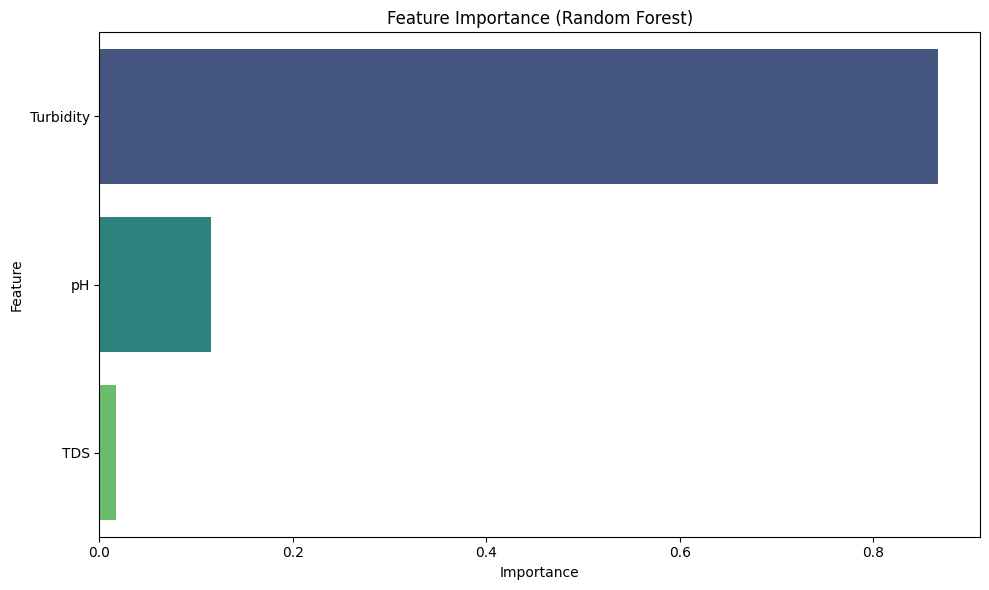

In [18]:
# Step 8: Feature Importance Analysis (if applicable)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nFeature Importance:")
    print(feature_importance)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
    plt.title(f'Feature Importance ({best_model_name})')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()

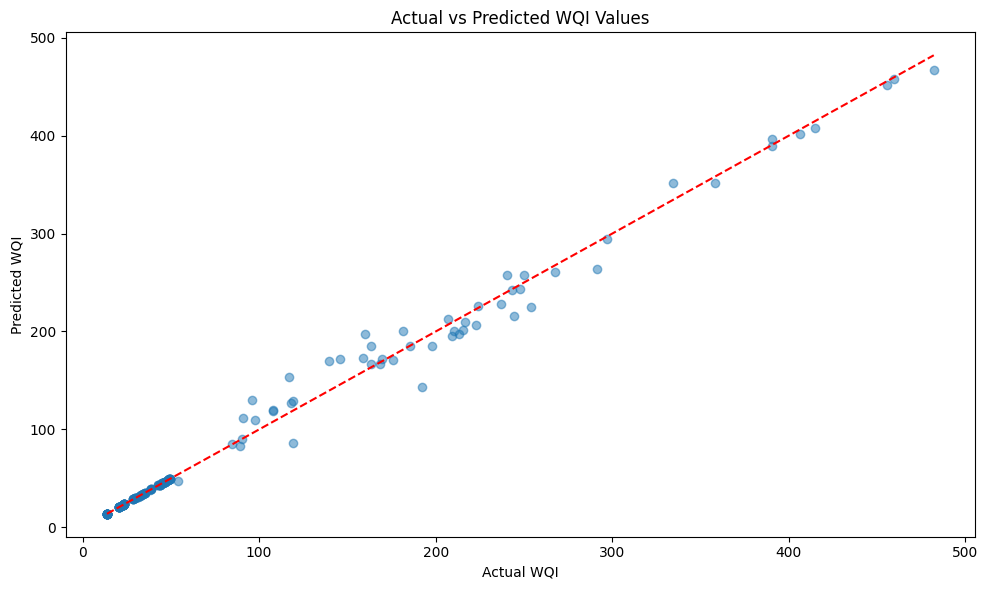

In [19]:
# Step 9: Visualize Predictions vs Actual Values
y_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_reg_test, y_pred, alpha=0.5)
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], 'r--')
plt.xlabel('Actual WQI')
plt.ylabel('Predicted WQI')
plt.title('Actual vs Predicted WQI Values')
plt.tight_layout()
plt.savefig('prediction_accuracy.png')
plt.show()

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of pH and TDS values
ph_range = np.linspace(df['pH'].min(), df['pH'].max(), 20)
tds_range = np.linspace(df['TDS'].min(), df['TDS'].max(), 20)
ph_mesh, tds_mesh = np.meshgrid(ph_range, tds_range)

# Choose a fixed turbidity value (median)
fixed_turbidity = df['Turbidity'].median()

# Create the input array for prediction
mesh_input = np.column_stack((ph_mesh.ravel(), tds_mesh.ravel(), 
                              np.full(ph_mesh.size, fixed_turbidity)))

# Scale the input
mesh_input_scaled = scaler.transform(mesh_input)

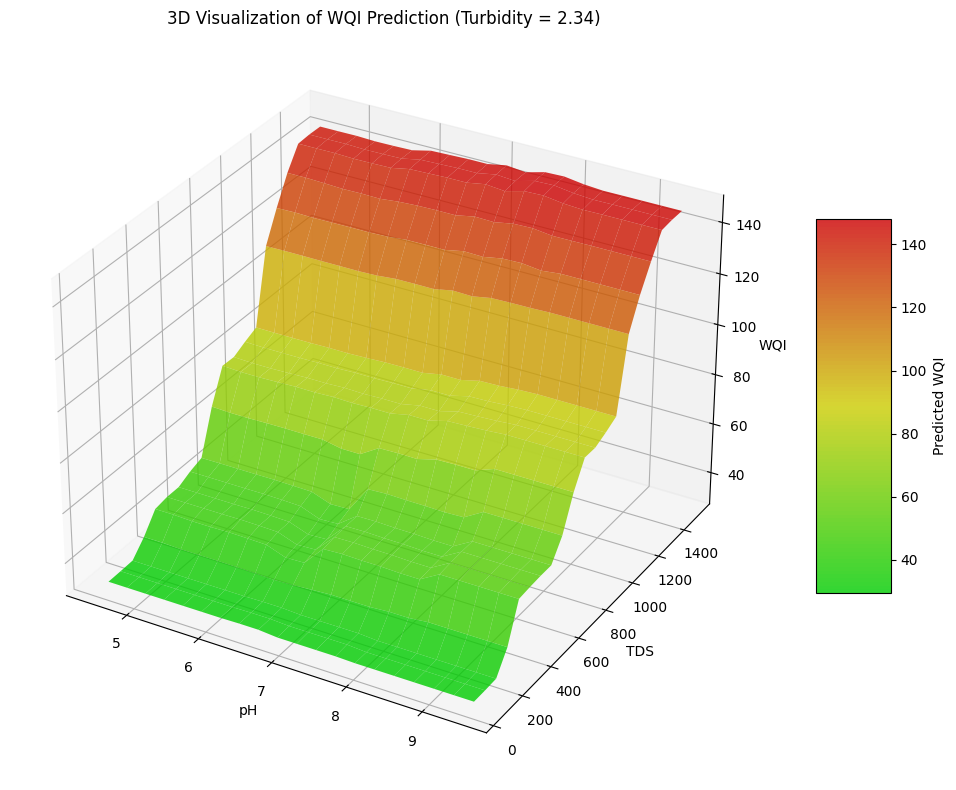

In [22]:
# Make predictions
mesh_predictions = best_model.predict(mesh_input_scaled)

# Reshape the predictions
wqi_mesh = mesh_predictions.reshape(ph_mesh.shape)

# Create a custom colormap from green to yellow to red
colors = [(0, 0.8, 0), (0.8, 0.8, 0), (0.8, 0, 0)]  # green, yellow, red
cmap_name = 'wqi_cmap'
cm_wqi = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

# Create the 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(ph_mesh, tds_mesh, wqi_mesh, cmap=cm_wqi, 
                      edgecolor='none', alpha=0.8)

# Add colorbar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Predicted WQI')

# Set labels
ax.set_xlabel('pH')
ax.set_ylabel('TDS')
ax.set_zlabel('WQI')
ax.set_title(f'3D Visualization of WQI Prediction (Turbidity = {fixed_turbidity:.2f})')

plt.tight_layout()
plt.savefig('3d_prediction_surface.png')
plt.show()

In [24]:
# Step 10: Create a Function for Prediction and Visualization
def predict_water_quality(ph, tds, turbidity):
    # Load models
    model = joblib.load("wqi_model.pkl")
    scaler = joblib.load("scaler.pkl")
    
    # Prepare input
    input_data = np.array([[ph, tds, turbidity]])
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    wqi_predicted = model.predict(input_scaled)[0]
    wqi_grade = get_wqi_grade(wqi_predicted)
    
    # Calculate based on the given function for comparison
    ph_score = abs((ph - 7) / 7.5) * 100
    turbidity_score = abs(turbidity / 5) * 100
    tds_score = abs(tds / 500) * 100
    
    # Determine weights
    if ph > 8.9 or ph < 6:
        W1, W2, W3 = 0.5, 0.2, 0.3  # Highly Alkaline Water
        water_type = "Highly Alkaline Water"
    elif turbidity > 15:
        W1, W2, W3 = 0.3, 0.5, 0.2  # High Sediment Water
        water_type = "High Sediment Water"
    elif tds > 1000:
        W1, W2, W3 = 0.3, 0.2, 0.5  # Industrial Waste Affected
        water_type = "Industrial Waste Affected"
    else:
        W1, W2, W3 = 0.4, 0.3, 0.3  # Normal Drinking Water
        water_type = "Normal Drinking Water"
    
    # Calculate formula-based WQI
    WQI_formula = (W1 * ph_score) + (W2 * turbidity_score) + (W3 * tds_score)
    WQI_formula = round(WQI_formula, 2)
    formula_grade = get_wqi_grade(WQI_formula)
    
    print("\n" + "="*50)
    print(f"WATER QUALITY ANALYSIS REPORT")
    print("="*50)
    print(f"Input Parameters:")
    print(f"pH: {ph}")
    print(f"TDS: {tds} mg/L")
    print(f"Turbidity: {turbidity} NTU")
    print(f"Water Type: {water_type}")
    print("-"*50)
    print(f"Model Prediction:")
    print(f"Predicted WQI: {wqi_predicted:.2f}")
    print(f"Predicted Grade: {wqi_grade}")
    print("-"*50)
    print(f"Formula Calculation:")
    print(f"Formula WQI: {WQI_formula:.2f}")
    print(f"Formula Grade: {formula_grade}")
    print("="*50)
    
    # Create a visualization of the results
    plt.figure(figsize=(14, 10))
    
    # Plot 1: Parameter Scores
    plt.subplot(2, 2, 1)
    params = ['pH', 'TDS', 'Turbidity']
    scores = [ph_score, tds_score, turbidity_score]
    weights = [W1, W2, W3]
    weighted_scores = [ph_score * W1, tds_score * W2, turbidity_score * W3]
    
    x = np.arange(len(params))
    width = 0.35
    
    plt.bar(x - width/2, scores, width, label='Raw Scores')
    plt.bar(x + width/2, weighted_scores, width, label='Weighted Scores')
    
    plt.xlabel('Parameters')
    plt.ylabel('Scores')
    plt.title('Parameter Scores Analysis')
    plt.xticks(x, params)
    plt.ylim(0, max(scores) * 1.2)
    plt.legend()
    
    # Plot 2: WQI Gauge
    plt.subplot(2, 2, 2)
    

In [25]:
def draw_gauge(value, grade):
        # Create gauge chart
        angles = np.linspace(0, 180, 100)
        
        # Gradient colors for the gauge
        colors = []
        for i in range(len(angles)):
            if i < 25:  # Green for A grade
                colors.append((0, 0.8, 0, (i+1)/25 * 0.8))
            elif i < 50:  # Yellow for B grade
                colors.append((0.8, 0.8, 0, (i-24)/25 * 0.8))
            else:  # Red for C grade
                colors.append((0.8, 0, 0, (i-49)/50 * 0.8))
        
        ax = plt.gca()

In [ ]:
       
        # Draw the color gradient arc
        for i in range(len(angles)-1):
            angle = np.deg2rad(angles[i])
            next_angle = np.deg2rad(angles[i+1])
            
            x1, y1 = np.cos(angle), np.sin(angle)
            x2, y2 = np.cos(next_angle), np.sin(next_angle)
            
            verts = [(0, 0), (x1*0.8, y1*0.8), (x2*0.8, y2*0.8)]
            ax.fill(verts, color=colors[i])
        
        # Draw boundary arcs
        theta = np.linspace(0, np.pi, 100)
        x_outer = 0.8 * np.cos(theta)
        y_outer = 0.8 * np.sin(theta)
        x_inner = 0.6 * np.cos(theta)
        y_inner = 0.6 * np.sin(theta)
        
        ax.plot(x_outer, y_outer, 'k-', lw=2)
        ax.plot(x_inner, y_inner, 'k-', lw=1)
        
        # Add grade markers
        grade_angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
        grade_labels = ['0', '25', '50', '75', '100']
        
        for angle, label in zip(grade_angles, grade_labels):
            x = 0.9 * np.cos(angle)
            y = 0.9 * np.sin(angle)
            plt.text(x, y, label, ha='center', va='center')
        
        # Draw grade sections
        plt.text(0.2, 0.3, 'A', fontsize=15, color='green')
        plt.text(0.5, 0.3, 'B', fontsize=15, color='gold')
        plt.text(0.7, 0.3, 'C', fontsize=15, color='red')
        
        # Draw the needle
        angle = np.deg2rad(value * 1.8)  # Map 0-100 to 0-180 degrees
        x = 0.7 * np.cos(angle)
        y = 0.7 * np.sin(angle)
        
        ax.plot([0, x], [0, y], 'k-', lw=3)
        ax.add_patch(plt.Circle((0, 0), 0.05, color='black'))
        
        # Add value text
        plt.text(0, -0.2, f"WQI Value: {value:.2f}", ha='center', fontsize=12)
        plt.text(0, -0.3, f"Grade: {grade}", ha='center', fontsize=15, 
                 color='green' if grade == 'A' else 'gold' if grade == 'B' else 'red')
        
        ax.set_xlim(-1, 1)
        ax.set_ylim(-0.5, 1)
        ax.axis('equal')
        ax.axis('off')
    
    draw_gauge(wqi_predicted, wqi_grade)
    plt.title('Water Quality Index (WQI) Meter')
    
    # Plot 3: Model Comparison
    plt.subplot(2, 2, 3)
    methods = ['Formula', 'ML Model']
    wqi_values = [WQI_formula, wqi_predicted]
    
    colors = ['gold' if get_wqi_grade(wqi) == 'B' else 
              'green' if get_wqi_grade(wqi) == 'A' else 'red' 
              for wqi in wqi_values]
    
    plt.bar(methods, wqi_values, color=colors)
    for i in range(len(methods)):
        plt.text(i, wqi_values[i] + 1, f"{wqi_values[i]:.2f}", ha='center')
        plt.text(i, wqi_values[i]/2, get_wqi_grade(wqi_values[i]), ha='center', fontsize=20, color='white')
    
    plt.ylim(0, 100)
    plt.ylabel('WQI Value')
    plt.title('WQI Calculation Methods Comparison')
    
    # Plot 4: Water Quality Parameters Scale
    plt.subplot(2, 2, 4)
    
    # Define parameter ranges and standards
    param_ranges = {
        'pH': {'ideal': (6.5, 8.5), 'min': 0, 'max': 14, 'value': ph},
        'TDS (mg/L)': {'ideal': (0, 500), 'min': 0, 'max': 2000, 'value': tds},
        'Turbidity (NTU)': {'ideal': (0, 5), 'min': 0, 'max': 50, 'value': turbidity}
    }
    
    y_pos = 0
    for param, ranges in param_ranges.items():
        # Draw the full range
        plt.plot([ranges['min'], ranges['max']], [y_pos, y_pos], 'k-', lw=2)
        
        # Draw the ideal range in green
        plt.plot([ranges['ideal'][0], ranges['ideal'][1]], [y_pos, y_pos], 'g-', lw=4)
        
        # Mark the current value
        if ranges['value'] > ranges['max']:
            marker_pos = ranges['max']
            color = 'red'
        elif ranges['value'] < ranges['min']:
            marker_pos = ranges['min']
            color = 'red'
        else:
            marker_pos = ranges['value']
            # Determine color based on whether it's in the ideal range
            if ranges['ideal'][0] <= ranges['value'] <= ranges['ideal'][1]:
                color = 'green'
            else:
                color = 'red'
        
        plt.plot(marker_pos, y_pos, 'o', ms=10, color=color)
        plt.text(marker_pos, y_pos - 0.1, f"{ranges['value']}", ha='center', va='top')
        
        # Add parameter name and range values
        plt.text(ranges['min'] - 0.05 * (ranges['max'] - ranges['min']), y_pos, 
                 f"{param}", ha='right', va='center')
        
        plt.text(ranges['min'], y_pos - 0.1, f"{ranges['min']}", ha='center', va='top')
        plt.text(ranges['max'], y_pos - 0.1, f"{ranges['max']}", ha='center', va='top')
        
        y_pos += 1
    
    plt.xlim(-1, max(param_ranges['pH']['max'], param_ranges['TDS (mg/L)']['max'], 
                    param_ranges['Turbidity (NTU)']['max']) * 1.1)
    plt.ylim(-0.5, len(param_ranges) - 0.5)
    plt.axis('off')
    plt.title('Water Quality Parameters Analysis')
    
    plt.tight_layout()
    plt.savefig('water_quality_report.png')
    plt.show()
    
    return wqi_predicted, wqi_grade, WQI_formula, formula_grade

# Step 11: Interactive Input
if __name__ == "__main__":
    print("\nWater Quality Index (WQI) Prediction System")
    print("-" * 40)
    
    while True:
        try:
            ph = float(input("\nEnter pH value (0-14): "))
            tds = float(input("Enter TDS value (mg/L): "))
            turbidity = float(input("Enter Turbidity value (NTU): "))
            
            wqi_predicted, wqi_grade, wqi_formula, formula_grade = predict_water_quality(ph, tds, turbidity)
            
            another = input("\nDo you want to analyze another water sample? (y/n): ")
            if another.lower() != 'y':
                break
                
        except ValueError:
            print("Please enter valid numeric values.")
        except Exception as e:
            print(f"An error occurred: {e}")
            break
    
    print("\nThank you for using the Water Quality Prediction System!")

NameError: name 'angles' is not defined